![](https://www.weenect.com/blog/wp-content/uploads/2018/07/accident-route-chien.jpg)

Goal: to help self-driving vehicles be more conscientious of their surroundings. Our cars have been very good at recognizing and avoiding humans. They haven't, however, been capable of recognizing dogs. Since dogs are man's best friend and will always be where we humans are, we want our cars to know if a dog is on the road in front of them and avoid the dog.

\\

The first step : **knowing if a pupper is in front of the car**

\\

Aim:  **build a detector that can tell when our car sees a dog or not**


In [ ]:
#loading packages and data

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
import numpy as np
from sklearn.metrics import accuracy_score
from collections import Counter
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import pandas as pd

def load_data():
  # download our data into a file called 'cifar_data'
  import gdown
  gdown.download('https://drive.google.com/uc?id=1-BjeqccJdLiBA6PnNinmXSQ6w5BluLem','cifar_data','True'); # dogs v road;

  #load the data from our cloud computer
  import pickle
  data_dict = pickle.load(open( "cifar_data", "rb" ));

  data   = data_dict['data']
  labels = data_dict['labels']

  return data, labels

def plot_one_image(data, labels, img_idx):
  from google.colab.patches import cv2_imshow
  import cv2
  import matplotlib.pyplot as plt
  my_img   = data[img_idx, :].squeeze().reshape([32,32,3]).copy()
  my_label = labels[img_idx]
  print('label: %s'%my_label)
  plt.imshow(my_img)
  plt.show()

def CNNClassifier():
  def create_model():
    model = Sequential()
    model.add(Reshape((32, 32, 3)))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2))
    model.add(Activation('softmax'))

    # initiate RMSprop optimizer
    opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

    # train the model using RMSprop
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model
  return KerasClassifier(build_fn=create_model, epochs=30, batch_size=10, verbose=2)

## Understanding data

From this video data, we want our car to tell if there's a 'road' or 'dog' in front of it

Step 1: reading that *labeled* data in


In [ ]:
# load our data using a custom function provided
data, labels = load_data()

In [ ]:
print(data)
print(data[0])
print(labels[0])
print('number of data:', len(data))
print('there are', len(data[0]), 'numbers in each data')
print('for each label, there are',len(data[0]), 'numbers showing the colour of each pixel?')

[[ 45  20  19 ...  83  99  31]
 [101 114  35 ... 155 134  91]
 [213 221 221 ... 139  58  47]
 ...
 [126 174 202 ... 124 128 129]
 [191 232 240 ...  74  93  81]
 [237 248 254 ...  45  56  10]]
[45 20 19 ... 83 99 31]
dog
number of data: 1200
there are 3072 numbers in each data
for each label, there are 3072 numbers showing the colour of each pixel?


In [ ]:
##personal work
df = pd.DataFrame(data)
df
#to print and display the whole thing: pd.set_option('display.max_columns', None)

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,45,20,19,42,21,18,35,17,13,33,...,71,77,68,53,66,75,29,83,99,31
1,101,114,35,94,116,48,98,112,42,124,...,100,164,130,98,145,120,79,155,134,91
2,213,221,221,119,127,122,58,71,81,58,...,55,141,55,46,136,52,43,139,58,47
3,141,70,8,139,61,2,136,55,0,131,...,144,254,208,141,255,206,138,227,174,105
4,154,179,152,159,183,157,165,189,162,174,...,119,132,148,135,136,149,137,146,157,146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,60,62,53,86,89,82,67,69,63,57,...,125,118,117,116,96,98,96,81,83,80
1196,219,229,229,195,206,197,172,184,172,137,...,90,147,151,107,136,142,99,110,119,74
1197,126,174,202,125,173,200,125,173,201,125,...,128,124,128,129,124,128,129,124,128,129
1198,191,232,240,189,230,237,190,231,238,186,...,98,104,117,101,95,111,97,74,93,81


label: dog


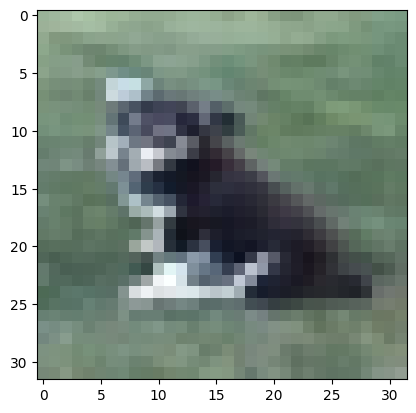

In [ ]:
# looking at first image using a custom function that helps us view images along with the labels
# plot_one_image takes in the data, the labels, and the index of the image you'd like to plot
plot_one_image(data, labels, 4)

label: road


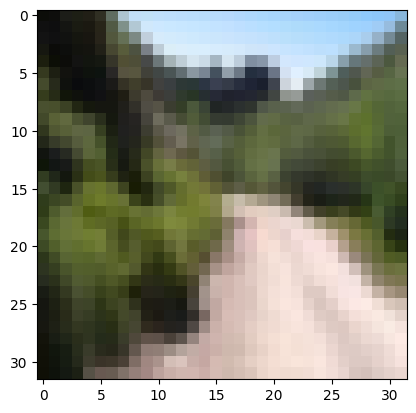

In [ ]:
#image of a road
plot_one_image(data, labels, 700)

In [ ]:
#size of our dataset
print(len(data))

1200


The dataset is organized such that the first 600 images are pictures of dogs and the last 600 images are pictures of roads.

label: dog


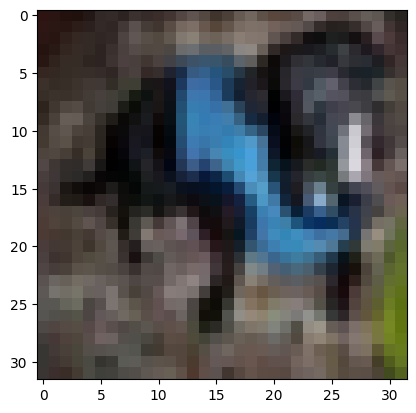

label: dog


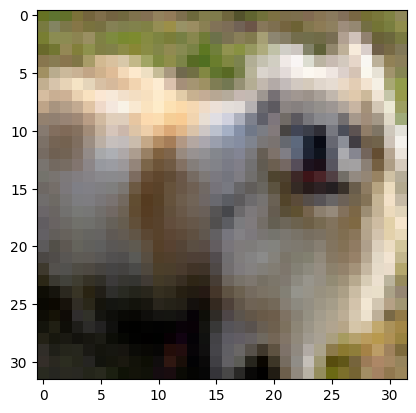

label: dog


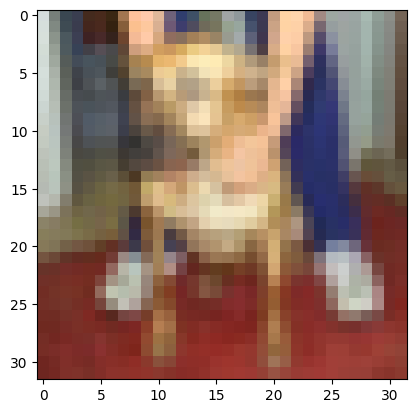

label: dog


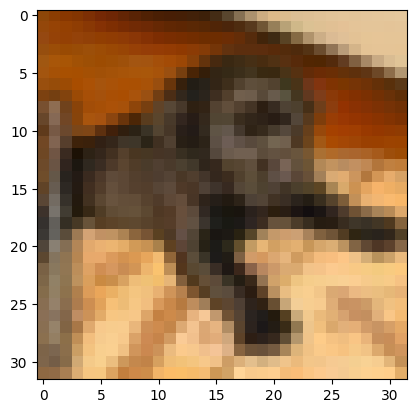

label: dog


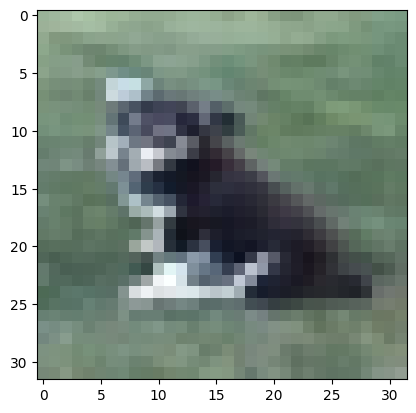

In [ ]:
for i in range(5):
  plot_one_image(data, labels, i)


In an image each pixel is denoted by three numbers (the R, G and B values). Below is a list of numbers for each image that represent the pixel values.


In [ ]:
print('One image looks like: ')
print(data[0])
print("Length of list: " + str(len(data[0])))

One image looks like: 
[45 20 19 ... 83 99 31]
Length of list: 3072


Each of these numbers is a single **input**.

In [ ]:
print('Each image is 32 x 32 pixels where each pixel has 3 values for \nred green and blue')
print('Each image has 32 x 32 x 3 = %d inputs'%data[0].shape)

Each image is 32 x 32 pixels where each pixel has 3 values for 
red green and blue
Each image has 32 x 32 x 3 = 3072 inputs


These inputs are used to classify, or predict, what the image is.

Image's category is contained in `labels` (list of all images' categories. Each label is either `dog` or `road`)

In [ ]:
print('Our labels list looks like:')
print(set(labels))

Our labels list looks like:
{'road', 'dog'}


How many dogs and roads do we have:

In [ ]:
print(Counter(labels))

Counter({'dog': 600, 'road': 600})


## A simple machine learner


Next goal: create a machine learning *model* that can tell us whether a new image is either a `dog` or a `road`.

1. give *model* a *training manual* of data and labels that it will study or train on.

2. check how well our model is doing on a *test*, where it is given data and told to predict their labels.



## Splitting our data


Build training manual and test from data set.
Below:.select randomly 20% of the data for the test, and 80% for the train.



In [ ]:
# Preparing data and create training and test inputs and labels
inputs_train, inputs_test, labels_train, labels_test = model_selection.train_test_split(data, labels, test_size=0.2)
inputs_train = inputs_train.astype('float32')
inputs_test = inputs_test.astype('float32')
inputs_train /= 255.0
inputs_test /= 255.0

## Creating model

Next: build and train a simple model

`KNeighborsClassifier` to train model with `fit`, giving it the training inputs and labels

In [ ]:
# Defining our classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Training our model with its trianing input data and labels
knn.fit(inputs_train, labels_train)

KNeighborsClassifier()

## Testing Model

Accuracy score : tells us what percentage of test data it classified correctly. 100% means that all the images were classifered correctly.

In [ ]:
# Predict what the classes are based on the testing data
predictions = knn.predict(inputs_test)

# Print the score on the testing data
print("KNN Testing Set Accuracy:")
print(accuracy_score(labels_test, predictions)*100)

KNN Testing Set Accuracy:
81.66666666666667


## Predicting new images

Use trained model to predict whether car is seeing a `dog` or `road`


label: road


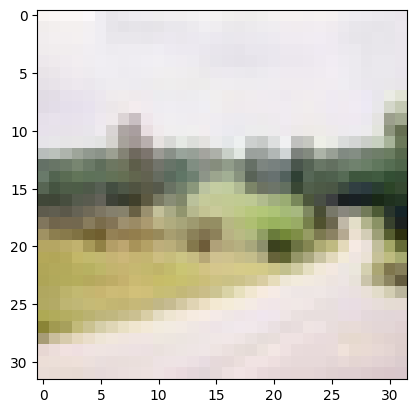

prediction: road


In [ ]:
# Specify which image you want to show
image_id = 89

# Visualize the image
plot_one_image(inputs_test, labels_test, image_id)

# Use the model to predict what this might be and print it
print('prediction:', knn.predict([inputs_test[image_id]])[0])


Build KNN model where you change the number of neighbors.
How high can the accuracy go?

Using a **for loop** to try out several different values of **k**, and checking accurac

In [ ]:

for i in np.arange(1, 10, 1):
  knn = KNeighborsClassifier(n_neighbors=5)


## Using a simple neural network

Next goal: try a neural network for this and see how well it does

Using `MLPClassifier` for simple neural network
*  playing with the **number of neurons** and the **number of hidden layers** to adjust the complexity of our model

**Example 1:**

Creating a neural network with 1 hidden layer and 3 neurons:

nnet = MLPClassifier(hidden_layer_sizes=(3))

**Example 2:**

Creating a neural network with 2 hidden layers and 3 neurons in each layer:

nnet = MLPClassifier(hidden_layer_sizes=(3, 3))

In [ ]:
# Create and train our multi layer perceptron model
nnet = MLPClassifier(hidden_layer_sizes=(8,8), max_iter= 10000)  ## How many hidden layers? How many neurons does this have?
nnet.fit(inputs_train, labels_train)

# Predict what the classes are based on the testing data
predictions = nnet.predict(inputs_test)

# Print the score on the testing data
print("MLP Testing Set Score:")
print(accuracy_score(labels_test, predictions)*100)

MLP Testing Set Score:
40.416666666666664


Multilayer perceptrons are more complex models -- it can be difficult to find the right "settings" for them

**Try the following:
* Train 1 layer-10 neuron MLP for practice
* Change the number of neurons and/or add layers to see how well you can do
* Increase or decrease the number of iterations

Using a for loop to explore various combinations of number of layers and number of hidden neurons within each layer.

It is hard to find the right 'settings' for these models

Neural networks -- hard to tune so the model performance can vary a lot.

In [ ]:
for ilayer in [(1), (1,1), (10), (10,10), (10,10, 5),(10,10,10), (10,30,10), (10,10,30)]:

  print('Layer parameters are ...')
  print(ilayer)
  nnet = MLPClassifier(hidden_layer_sizes=ilayer, max_iter=1000)

  nnet.fit(inputs_train, labels_train)

  # Predict what the classes are based on the testing data
  predictions = nnet.predict(inputs_test)

  # Print the score on the testing data
  print("MLP Testing Set Score:")
  print(accuracy_score(labels_test, predictions)*100)

Layer parameters are ...
1
MLP Testing Set Score:
87.08333333333333
Layer parameters are ...
(1, 1)
MLP Testing Set Score:
40.416666666666664
Layer parameters are ...
10
MLP Testing Set Score:
88.33333333333333
Layer parameters are ...
(10, 10)
MLP Testing Set Score:
86.66666666666667
Layer parameters are ...
(10, 10, 5)
MLP Testing Set Score:
87.08333333333333
Layer parameters are ...
(10, 10, 10)
MLP Testing Set Score:
87.08333333333333
Layer parameters are ...
(10, 30, 10)
MLP Testing Set Score:
87.08333333333333
Layer parameters are ...
(10, 10, 30)
MLP Testing Set Score:
86.25


## Models for vision: Convolutional Neural Networks

Convolutional neural networks (CNNs): famous type of neural network

Works very well on problems to do with computer vision

In [ ]:
# Create and train multi layer perceptron model
cnn = CNNClassifier()

cnn.fit(inputs_train, labels_train)

# Predict what the classes are based on the testing data
predictions = cnn.predict(inputs_test)

# Print the score on the testing data
print("CNN Testing Set Score:")
print(accuracy_score(labels_test, predictions)*100)

<ipython-input-24-3a9c38586cb8>:74: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  return KerasClassifier(build_fn=create_model, epochs=30, batch_size=10, verbose=2)


Epoch 1/30
96/96 - 11s - loss: 0.5864 - accuracy: 0.6990 - 11s/epoch - 119ms/step
Epoch 2/30
96/96 - 1s - loss: 0.4104 - accuracy: 0.8271 - 530ms/epoch - 6ms/step
Epoch 3/30
96/96 - 0s - loss: 0.3025 - accuracy: 0.8740 - 431ms/epoch - 4ms/step
Epoch 4/30
96/96 - 0s - loss: 0.2626 - accuracy: 0.8740 - 344ms/epoch - 4ms/step
Epoch 5/30
96/96 - 0s - loss: 0.2206 - accuracy: 0.9073 - 353ms/epoch - 4ms/step
Epoch 6/30
96/96 - 0s - loss: 0.2067 - accuracy: 0.9198 - 353ms/epoch - 4ms/step
Epoch 7/30
96/96 - 0s - loss: 0.1782 - accuracy: 0.9281 - 350ms/epoch - 4ms/step
Epoch 8/30
96/96 - 0s - loss: 0.1779 - accuracy: 0.9365 - 355ms/epoch - 4ms/step
Epoch 9/30
96/96 - 0s - loss: 0.1651 - accuracy: 0.9354 - 339ms/epoch - 4ms/step
Epoch 10/30
96/96 - 0s - loss: 0.1501 - accuracy: 0.9438 - 342ms/epoch - 4ms/step
Epoch 11/30
96/96 - 0s - loss: 0.1502 - accuracy: 0.9417 - 349ms/epoch - 4ms/step
Epoch 12/30
96/96 - 0s - loss: 0.1457 - accuracy: 0.9458 - 344ms/epoch - 4ms/step
Epoch 13/30
96/96 - 0s -